# Project: Investigate a Dataset (Find Correlation between Movies Features)

Oluwasola Oyinloye (June 01, 2022)


<a id='intro'></a>
## Introduction

In this project, i have investigated a dataset of Movies records from 1980 to 2020. The dataset include some attributes of movies. The analysis is focused on finding correlation influencing movies gross revenue.

The original movie data set can be found here:
https://www.kaggle.com/danielgrijalvas/movies

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the comfiguretion of the plots we will create.

In [2]:
# Read in the data
df = pd.read_csv('movies.csv')

In [3]:
# Let's have an initial view of the dataset.
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Another view of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# List of columns 
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
# Summary statistics of the dataframe.
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


**Additional Information**

* **Age**: The movies score are 6.4 on average. 25% of the scores are below 5.8 and majority of the patients are below 7.1.

In [7]:
# Check for missing values.
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

There are 77, 2, 3, 3, 3, 1, 3, 2171, 189, 17 and 4 missing values in the rating, released, score, votes, writer, star, country, budget, gross, company and runtime columns respectively.

In [8]:
# Replacing missing values with appropriate central tendency of data.
# Fill score column with mean
df.score = df['score'].fillna(df['score'].mean())

# Fill votes column with mean
df.votes = df['votes'].fillna(df['votes'].mean())

# Fill budget column with mean
df.budget = df['budget'].fillna(df['budget'].mean())

# Fill gross column with mean
df.gross = df['gross'].fillna(df['gross'].mean())



# Fill the object(string) column type with the previous value.
df.runtime = df['runtime'].fillna(method='pad')
df.rating = df['rating'].fillna(method='pad')
df.released = df['released'].fillna(method='pad')
df.writer = df['writer'].fillna(method='pad')
df.star = df['star'].fillna(method='pad')
df.country = df['country'].fillna(method='pad')
df.company = df['company'].fillna(method='pad')

In [9]:
# Check that the missing values are filled appropriately
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
# extract the year from released column to create a correct_year column.
# Since the year column and the released column year does not correspond
# through out the rows.
df['correct_year'] = df['released'].str.extract(r'(?<=, )(\d+)', expand=False).fillna('')
df['correct_year'] = pd.to_datetime(df['correct_year']).dt.strftime('%Y')

In [11]:
# Check for duplicates in the name column and drop.
df['name'].drop_duplicates(keep='first')

0                                          The Shining
1                                      The Blue Lagoon
2       Star Wars: Episode V - The Empire Strikes Back
3                                            Airplane!
4                                           Caddyshack
                             ...                      
7663                                      More to Life
7664                                       Dream Round
7665                                     Saving Mbango
7666                                      It's Just Us
7667                                         Tee em el
Name: name, Length: 7512, dtype: object

In [12]:
# Let's see the year the movies were compiled.
print('The dataframe is composed of movies from {} to {}'.format(df['year'].min(),df['year'].max()))

The dataframe is composed of movies from 1980 to 2020


### **Value counts of some columns to have a look of popular values.**

In [13]:
# Value count of rating column.
df['rating'].value_counts()

R            3733
PG-13        2125
PG           1269
Not Rated     292
G             155
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

The popular movies rating from 1980 to 2020 are R, PG-13, PG with count of 3733, 2125, 1269 respectively and the least popolar are TV-MA, TV-PG, X, Approved, TV-14 with count of 9, 5, 3, 1 respectively.

In [14]:
# Value count of genre column.
df['genre'].value_counts()

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: genre, dtype: int64

The popular movies genre from 1980 to 2020 are Comedy, Action, Drama with count of 2245, 1705, 1518 respectively and the least popolar are Sci-Fi and Romance, Western, Musical, Music, History, Sport with count of 10, 10, 3, 2, 1, 1, 1 respectively.

In [15]:
# Value count of score column.
df['score'].value_counts()

6.6    359
6.4    351
6.2    346
6.7    332
6.5    331
      ... 
2.8      2
9.3      1
2.6      1
2.3      1
9.0      1
Name: score, Length: 73, dtype: int64

The popular movies score from 1980 to 2020 are 6.6, 6.4, 6.2 with count of 359, 351, 346 respectively and the least popolar are 2.8, 9.3, 2.6, 2.3, 9.0 with count of 2, 1, 1, 1, 1 respectively.

In [16]:
# Value count of director column.
df['director'].value_counts()

Woody Allen         38
Clint Eastwood      31
Directors           28
Steven Spielberg    27
Ron Howard          24
                    ..
Marcelo Epstein      1
Thomas Rickman       1
Paolo Taviani        1
Lawrence Dane        1
Pereko Mosia         1
Name: director, Length: 2949, dtype: int64

The top movies directors from 1980 to 2020 are Woody Allen, Clint Eastwood with count of 38, 31 respectively and the least popolar are Marcelo Epstein, Thomas Rickman , Paolo Taviani, Lawrence Dane, Pereko Mosia with count of 1, 1, 1, 1, 1 respectively.

In [17]:
# Value count of writer column.
df['writer'].value_counts()

Woody Allen        37
Stephen King       31
Luc Besson         26
John Hughes        25
David Mamet        15
                   ..
Bonnie Turner       1
Dick King-Smith     1
Helen Prejean       1
Gilles Adrien       1
Pereko Mosia        1
Name: writer, Length: 4535, dtype: int64

The top movies writer from 1980 to 2020 are Woody Allen, Stephen King  with count of 37, 31 respectively and the least popolar are Bonnie Turner, Dick King-Smith, Helen Prejean, Gilles Adrien, Pereko Mosia with count of 1, 1, 1, 1, 1 respectively.

In [18]:
# Value count of star column.
df['star'].value_counts()

Nicolas Cage         43
Robert De Niro       41
Tom Hanks            41
Denzel Washington    37
Bruce Willis         34
                     ..
Schuyler Fisk         1
Liesel Matthews       1
James Cromwell        1
Suzanna Love          1
Siyabonga Mabaso      1
Name: star, Length: 2814, dtype: int64

The top stars from 1980 to 2020 are Nicolas Cage, Robert De Niro, Tom Hanks with count of 43, 41, 41 respectively and the least popolar are Schuyler Fisk, Liesel Matthews, James Cromwell, Suzanna Love, Siyabonga Mabaso with count of 1, 1, 1, 1, 1 respectively.

In [19]:
# Value count of country column.
df['country'].value_counts()

United States                     5476
United Kingdom                     817
France                             279
Canada                             190
Germany                            117
Australia                           92
Japan                               81
Italy                               62
India                               62
Spain                               47
Hong Kong                           45
Ireland                             43
China                               40
South Korea                         35
Denmark                             32
Sweden                              25
New Zealand                         25
Mexico                              22
Norway                              12
West Germany                        12
Netherlands                         12
Iran                                10
Switzerland                         10
Russia                               8
Belgium                              8
Argentina                

The top five countries movies were produced from 1980 to 2020 are United States, United Kingdom, France, Canada, Germany with count of 5476, 817, 279, 190, 117 respectively.

In [20]:
# Value count of company column.
df['company'].value_counts()

Universal Pictures          377
Warner Bros.                334
Columbia Pictures           332
Paramount Pictures          320
Twentieth Century Fox       240
                           ... 
NDF International             1
Green Parrot                  1
Doug Liman Productions        1
Digital Image Associates      1
PK 65 Films                   1
Name: company, Length: 2385, dtype: int64

The top five company movies from 1980 to 2020 are Universal Pictures, Warner Bros, Columbia Pictures, Paramount Pictures, Twentieth Century Fox with count of 377, 334, 332, 320, 240 respectively.

In [21]:
# sort the dataframe using the gross column from highest to lowest.
df.sort_values(by='gross', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,2.370000e+08,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3.560000e+08,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,2.000000e+08,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,2.450000e+08,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3.210000e+08,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,3.558988e+07,1.400000e+03,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,Not Rated,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,3.558988e+07,7.900000e+02,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,3.558988e+07,6.820000e+02,Roxwell Films,93.0,2020
2417,Madadayo,PG,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,1.190000e+07,5.960000e+02,DENTSU Music And Entertainment,134.0,1993


### **Highlight** 

 Features with high correlation with Gross Revenue.

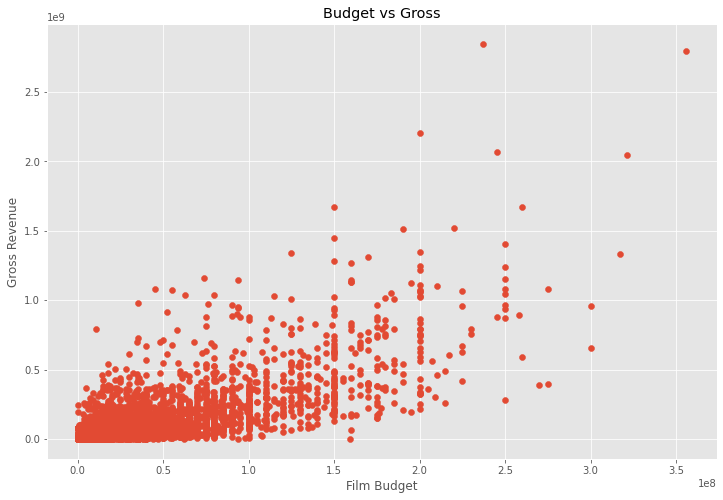

In [22]:
# Scatter plot with budget vs gross revenue.
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')

plt.show;

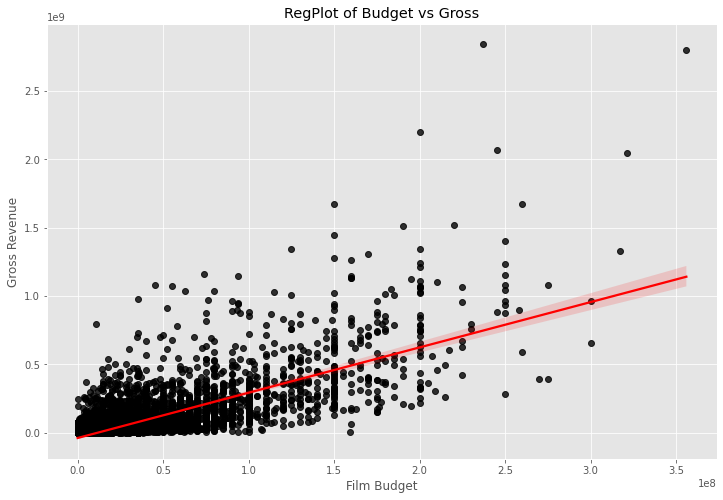

In [23]:
# Regplot with budget vs gross revenue using seaborn.
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'black'}, line_kws={'color':'red'})
plt.title('RegPlot of Budget vs Gross')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue');

The above plot shows a positive correlation between the Film Budget and the Gross Revenue.

In [24]:
# checking correlation between the numerical features.
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120694
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399239
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309193
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265393
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241298
runtime,0.120694,0.399239,0.309193,0.265393,0.241298,1.000000


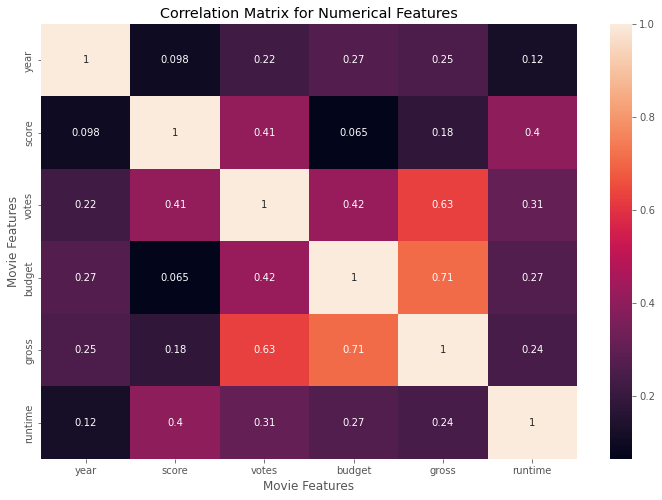

In [25]:
# Visualize the correlation matrix.
numeric_correlation_matrix = df.corr()
sns.heatmap(numeric_correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show();

* The above correlation matrix shows that the budget and votes are most correlated features with gross having 0.71 and 0.63 respectively.
* The least correlated features are runtime and score with values of 0.24 and 0.18 respectively.

### **Categorize the columns with object datatypes and check their correlation with the gross features.**

In [26]:
# Let's categorize the columns with object datatype.
df_categorized = df

for col_name in df_categorized.columns:
    if (df_categorized[col_name].dtype == 'object'):
        df_categorized[col_name] = df_categorized[col_name].astype('category')
        df_categorized[col_name] = df_categorized[col_name].cat.codes
        
df_categorized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0


Each Object column is categorized

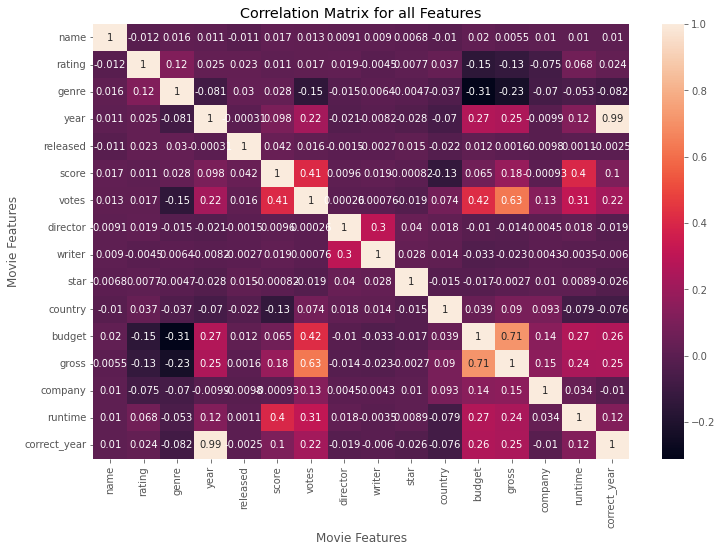

In [27]:
# Visualize the correlation matrix of all features (both categorize and numerical features).
all_correlation_matrix = df_categorized.corr()
sns.heatmap(all_correlation_matrix, annot=True)

plt.title('Correlation Matrix for all Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show();

In [28]:
# Unstack the correlations to see more clearly.
correlation_mat = df_categorized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs.head(60)

name    name            1.000000
        rating         -0.011776
        genre           0.016355
        year            0.011453
        released       -0.010758
        score           0.017095
        votes           0.013086
        director        0.009079
        writer          0.009033
        star            0.006820
        country        -0.010127
        budget          0.020368
        gross           0.005466
        company         0.009980
        runtime         0.010448
        correct_year    0.010221
rating  name           -0.011776
        rating          1.000000
        genre           0.116837
        year            0.025051
        released        0.022667
        score           0.011322
        votes           0.017057
        director        0.018842
        writer         -0.004470
        star            0.007728
        country         0.036900
        budget         -0.154311
        gross          -0.127284
        company        -0.075280
        ru

In [29]:
# Sorting the features in term of value.
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(60)

genre         budget         -0.310566
budget        genre          -0.310566
genre         gross          -0.230267
gross         genre          -0.230267
rating        budget         -0.154311
budget        rating         -0.154311
votes         genre          -0.145276
genre         votes          -0.145276
score         country        -0.134418
country       score          -0.134418
gross         rating         -0.127284
rating        gross          -0.127284
genre         correct_year   -0.081616
correct_year  genre          -0.081616
year          genre          -0.081261
genre         year           -0.081261
runtime       country        -0.078803
country       runtime        -0.078803
              correct_year   -0.075539
correct_year  country        -0.075539
company       rating         -0.075280
rating        company        -0.075280
genre         company        -0.070347
company       genre          -0.070347
country       year           -0.069859
year          country    

### **Classifying features base on high or low correlation with gross revenue.**

In [30]:
# Features having correlation greater than or equal to 0.5 but not 1.
# Features having 1 correlation are definately feature compare to itself.
high_corr = sorted_pairs[(sorted_pairs >= 0.5) & (sorted_pairs != 1)]
high_corr

votes         gross           0.628713
gross         votes           0.628713
budget        gross           0.711270
gross         budget          0.711270
year          correct_year    0.993136
correct_year  year            0.993136
dtype: float64

* The budget and votes values are greater than 0.5

In [31]:
# Features having correlation less than 0.5.
low_corr = sorted_pairs[(sorted_pairs < 0.5)]
low_corr

genre    budget   -0.310566
budget   genre    -0.310566
genre    gross    -0.230267
gross    genre    -0.230267
rating   budget   -0.154311
                     ...   
runtime  score     0.399239
score    votes     0.409182
votes    score     0.409182
         budget    0.421007
budget   votes     0.421007
Length: 234, dtype: float64

### **Conclusion:**

* The movies are recorded from 1980 to 2020.
* Budget and votes  have the highest correlation to gross revenue with value of 0.711 and 0.629.
* The least correlated features are runtime and score with values of 0.24 and 0.18 respectively.